# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Bernardo!👏🚀

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa. Fiz algumas sugestões que podem contribuir para elevar ainda mais a qualidade do projeto.

O projeto está aprovado. Continue com o excelente trabalho!

</div>

# Spring 9: Tomando Decisões de Negócios Baseadas em Dados

##### Você é analista em uma grande loja online. Junto com o departamento de marketing, você compilou uma lista de hipóteses que podem ajudar a aumentar a receita. Você precisa priorizar essas hipóteses, lançar um teste A/B e analisar os resultados.

#### Pré-Processar os dados

In [1]:
#importações
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#dados
hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
#info
print(hypotheses_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [4]:
#processando dados
#valores ausentes
hypotheses_miss =  hypotheses_us.isnull().sum()
print(hypotheses_miss)

#valores duplicados
duplicated_values = hypotheses_us.duplicated().sum()
print(duplicated_values)

#colunas com letras minúsculas
hypotheses_us.columns = hypotheses_us.columns.str.lower()
print(hypotheses_us.info())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Processamento dos dados realizado corretamente.
</div>

## Parte 1 - Priorizando Hipóteses

#### Aplicar o framework ICE para priorizar hipóteses.
#### Aplicar o framework RICE para priorizar hipóteses.
#### Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE.

In [5]:
#ICE
print(hypotheses_us.head(5))
print()
hypotheses_us['ICE'] = (hypotheses_us['impact'] * hypotheses_us['confidence']) / hypotheses_us['effort']
print(hypotheses_us[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This wi

In [6]:
#RICE
print(hypotheses_us.head(5))
print()
hypotheses_us['RICE'] = (hypotheses_us['reach'] * hypotheses_us['impact'] * hypotheses_us['confidence']) / hypotheses_us['effort']
print(hypotheses_us[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort        ICE  
0           8       6  13.333333  
1           4      10   2.000000  
2           7       3   7.000000  
3           3       8   1.125000  
4           1       1   1.000000  

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3 

<AxesSubplot:>

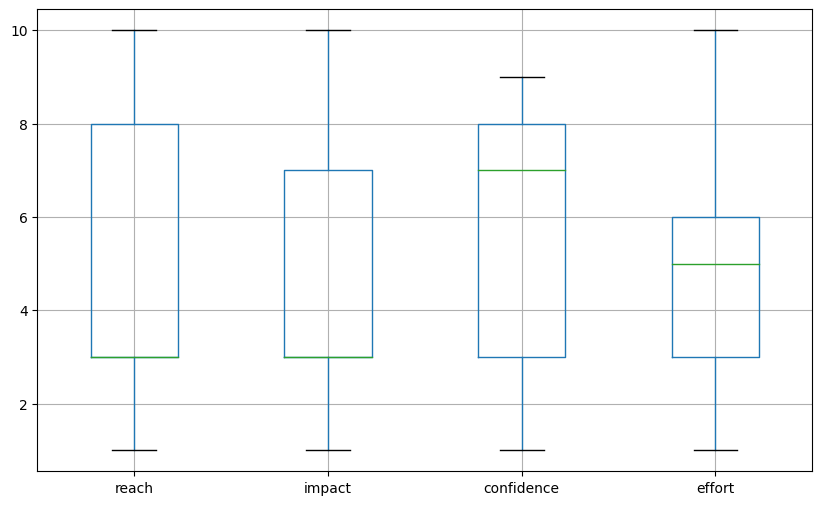

In [7]:
hypotheses_us.drop(columns=['ICE', 'RICE']).boxplot(figsize=(10, 6))

Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.
- O fator Reach no RICE muda drasticamente a priorização porque ele considera a quantidade de pessoas que serão impactadas pela hipótese. No método ICE, esse fator não é considerado. O uso do RICE em vez do ICE dá uma perspectiva mais abrangente, especialmente útil quando o alcance de uma hipótese é uma consideração importante para priorização.

## Parte 2 - Análise de teste A/B

#### Pré-Processar os dados

In [8]:
#dados
orders_us = pd.read_csv('/datasets/orders_us.csv')
visits_us = pd.read_csv('/datasets/visits_us.csv')

In [9]:
print(orders_us.info())
print(visits_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [10]:
#converter coluna date para o tipo datetime
orders_us['date'] = pd.to_datetime(orders_us['date'])
visits_us['date'] = pd.to_datetime(visits_us['date'])

#colunas com letras minúsculas
orders_us.columns = orders_us.columns.str.lower()
print(orders_us.head(5))
print(orders_us.info())

   transactionid   visitorid       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


In [11]:
print(visits_us.head(5))
print(visits_us.info())

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [12]:
#quantos grupos cada visitante pertence
visits_group_counts = orders_us.groupby('visitorid')['group'].nunique()

#filtrar os visitantes que estão em mais de um grupo
multi_group_visitors = visits_group_counts[visits_group_counts > 1].index

# Exibir a lista de visitantes em mais de um grupo
if len(multi_group_visitors) > 0:
    print(f"Visitantes em mais de um grupo: {multi_group_visitors}")

    # Remover esses visitantes dos dados
    orders_us = orders_us[~orders_us['visitorid'].isin(multi_group_visitors)]
    print(f"Total de registros após remover visitantes em ambos os grupos: {len(orders_us)}")
else:
    print("Nenhum visitante está em mais de um grupo.")

Visitantes em mais de um grupo: Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
            2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
            2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
            2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
            3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
            3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
            3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
            4186807279, 4256040402, 4266935830],
           dtype='int64', name='visitorid')
Total de registros após remover visitantes em ambos os grupos: 1016


#### Faça o teste A/B

- 1.Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.
- 2.Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.
- 3.Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.
- 4.Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.
- 5.Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.
- 6.Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.
- 7.Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.
- 8.Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.
- 9.Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
- 10.Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
- 11.Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
- 12.Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
- 13.Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

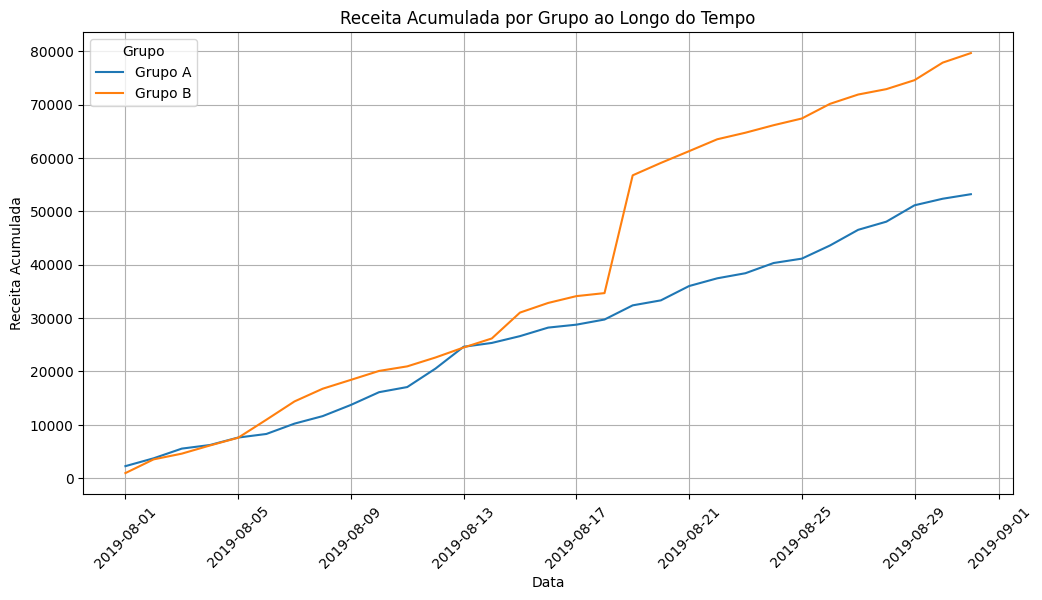

In [13]:
#1
# Agrupar a receita por grupo e data
cumulative_revenue = orders_us.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Calcular a receita acumulada para cada grupo
cumulative_revenue['cumulative_revenue'] = cumulative_revenue.groupby('group')['revenue'].cumsum()

# Plotar o gráfico de receita acumulada
plt.figure(figsize=(12, 6))
for group in cumulative_revenue['group'].unique():
    group_data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_revenue'], label=f'Grupo {group}')

plt.title('Receita Acumulada por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

De acordo com o gráfico, podemos tirar algumas conclusões:
- Podemos ver que, ao longo do tempo, o grupo B apresenta uma curva de receita acumulada mais acentuada, o que pode indicar que ele está gerando mais receita por visitante.
- Durante o período do dia 08/17 ao 08/21, é possível observar um leve aumento na receita do grupo B, o que pode ter sido influenciado por uma campanha de marketing ou uma mudança no site.
- Momentos de convergência: podem indicar que a diferença inicial no desempenho dos grupos está se reduzindo.

        date group  revenue  transactionid  cumulative_revenue  \
0 2019-08-01     A   2266.6             23              2266.6   
1 2019-08-01     B    967.2             17               967.2   
2 2019-08-02     A   1468.3             19              3734.9   
3 2019-08-02     B   2568.1             23              3535.3   
4 2019-08-03     A   1815.2             24              5550.1   

   cumulative_transactions  cumulative_avg_order_size  
0                       23                  98.547826  
1                       17                  56.894118  
2                       42                  88.926190  
3                       40                  88.382500  
4                       66                  84.092424  


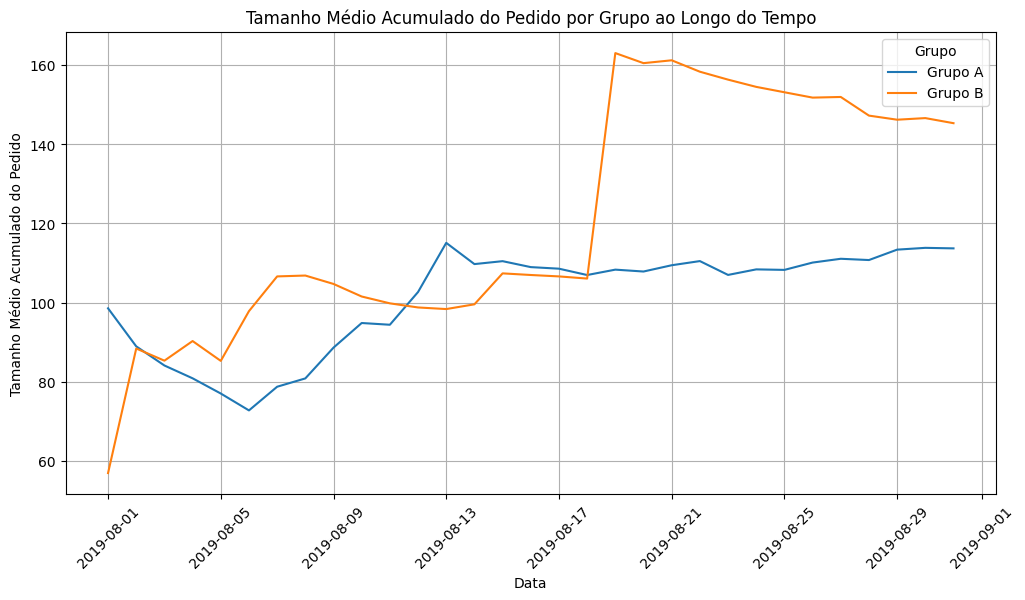

In [14]:
#2
#receita acumulada e o número de transações acumuladas para cada grupo
cumulative_data = orders_us.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionid': 'count'}).reset_index()
cumulative_data['cumulative_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cumulative_transactions'] = cumulative_data.groupby('group')['transactionid'].cumsum()

#tamanho médio acumulado do pedido (receita média por transação) para cada grupo
cumulative_data['cumulative_avg_order_size'] = cumulative_data['cumulative_revenue'] / cumulative_data['cumulative_transactions']

#primeiros registros
print(cumulative_data.head())

plt.figure(figsize=(12, 6))

#tamanho médio acumulado do pedido por grupo
for group in cumulative_data['group'].unique():
    group_data = cumulative_data[cumulative_data['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order_size'], label=f'Grupo {group}')

#titulos
plt.title('Tamanho Médio Acumulado do Pedido por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

- No início (em 2019-08-01), o tamanho médio acumulado do pedido para o Grupo A é de aproximadamente 98.55 unidades monetárias, enquanto para o Grupo B é de cerca de 56.89. Isso indica que, logo no primeiro dia, os clientes do Grupo A estão fazendo pedidos de valor maior do que os clientes do Grupo B. Se os grupos A e B representam diferentes estratégias de marketing ou diferentes experimentos (por exemplo, um grupo pode estar recebendo descontos, enquanto o outro não), podemos conjecturar que a estratégia aplicada ao Grupo A no inicio resultou em pedidos de maior valor, mas à medida que o tempo passa, a estratégia aplicada ao Grupo B parece estar incentivando pedidos de maior valor.
- Seria importante continuar monitorando essas métricas para ver se a tendência se mantém. Se o tamanho médio acumulado do pedido continuar diminuindo, pode ser necessário ajustar as estratégias para manter ou aumentar o valor médio por transação.

In [15]:
#3
#dados do grupo A e B
cumulative_avg_order_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'cumulative_avg_order_size']]
cumulative_avg_order_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'cumulative_avg_order_size']]

#renomeando colunas
cumulative_avg_order_A = cumulative_avg_order_A.rename(columns={'cumulative_avg_order_size': 'cumulative_avg_order_size_A'})
cumulative_avg_order_B = cumulative_avg_order_B.rename(columns={'cumulative_avg_order_size': 'cumulative_avg_order_size_B'})

#merge
merged_data = pd.merge(cumulative_avg_order_A, cumulative_avg_order_B, on='date')

#diferença relativa
merged_data['relative_difference'] = ((merged_data['cumulative_avg_order_size_B'] - merged_data['cumulative_avg_order_size_A']) / merged_data['cumulative_avg_order_size_A']) * 100

print(merged_data.head())

        date  cumulative_avg_order_size_A  cumulative_avg_order_size_B  \
0 2019-08-01                    98.547826                    56.894118   
1 2019-08-02                    88.926190                    88.382500   
2 2019-08-03                    84.092424                    85.312963   
3 2019-08-04                    80.851948                    90.272059   
4 2019-08-05                    77.006061                    85.256180   

   relative_difference  
0           -42.267506  
1            -0.611395  
2             1.451425  
3            11.651062  
4            10.713597  


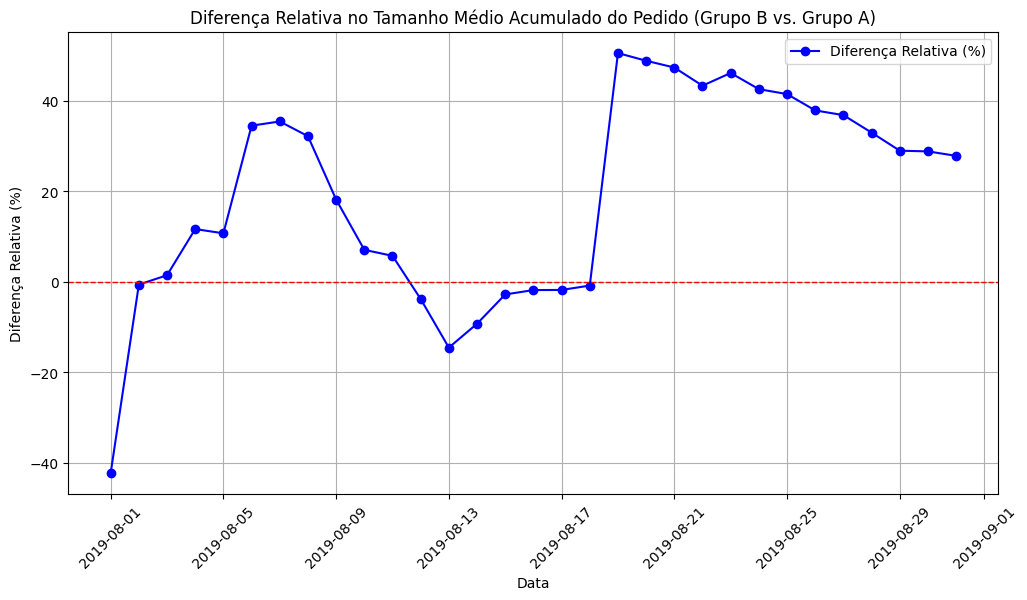

In [16]:
plt.figure(figsize=(12, 6))

#diferença relativa ao longo do tempo
plt.plot(merged_data['date'], merged_data['relative_difference'], marker='o', linestyle='-', color='b', label='Diferença Relativa (%)')

#título e rótulos
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.xticks(rotation=45)
plt.grid(True)

#linha de referência em 0%
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)

plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Análises de receita acumulada,volume dos pedidos e diferença relativa estão corretas. 
        
</div>

- De acordo com o gráfico podemos verificar que em certos períodos temos a Diferença Relativa no Tamanho Médio Acumulado do Pedido positivo, logo significa que o grupo B está gerando pedidos maiores em média.
- Também podemos identificar uma flutuação acima e abaixo de 0%, isso pode indicar uma variação no comportamento dos clientes de ambos os grupos ao longo do tempo, possivelmente em resposta a campanhas de marketing, eventos ou outros fatores.
- Seria ideal continuar o monitorando da diferença relativa ao longo do tempo, podendo fornecer insights adicionais sobre o comportamento dos clientes e a eficácia das campanhas. Além de ajudar as estratégias de marketing e vendas para maximizar o tamanho médio dos pedidos.

In [17]:
#4
#agrupar o número de pedidos por data e grupo
daily_orders = orders_us.groupby(['date', 'group']).agg({'transactionid': 'count'}).reset_index()
daily_orders = daily_orders.rename(columns={'transactionid': 'daily_orders'})

#merge de pedidos e visitas por data e grupo
conversion_data = pd.merge(daily_orders, visits_us, on=['date', 'group'])

#taxa de conversão
conversion_data['conversion_rate'] = conversion_data['daily_orders'] / conversion_data['visits']

print(conversion_data.head())

        date group  daily_orders  visits  conversion_rate
0 2019-08-01     A            23     719         0.031989
1 2019-08-01     B            17     713         0.023843
2 2019-08-02     A            19     619         0.030695
3 2019-08-02     B            23     581         0.039587
4 2019-08-03     A            24     507         0.047337


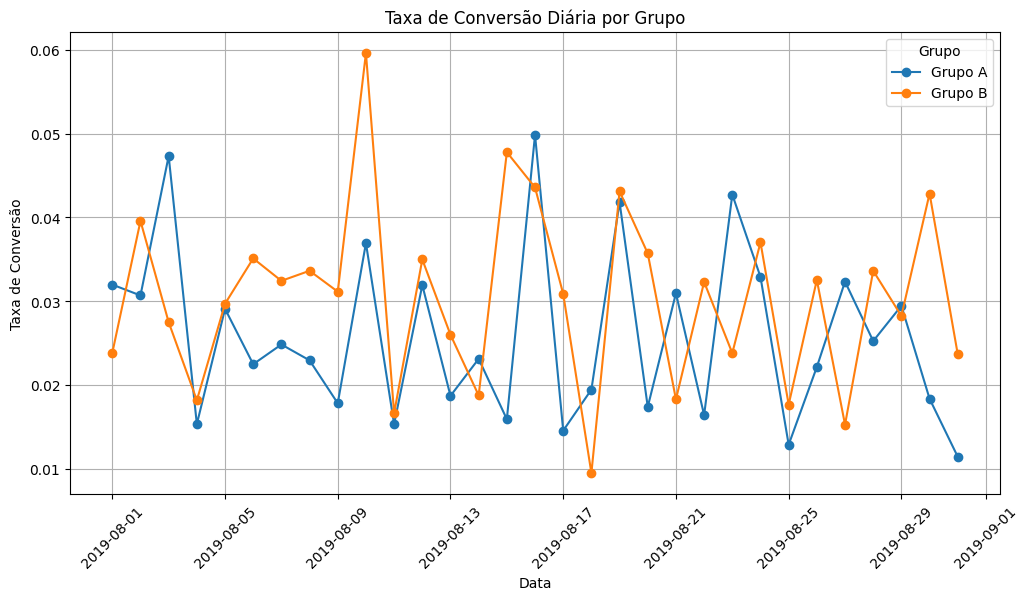

In [18]:
#4
plt.figure(figsize=(12, 6))

#taxas de conversão para cada grupo
for group in conversion_data['group'].unique():
    group_data = conversion_data[conversion_data['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], marker='o', linestyle='-', label=f'Grupo {group}')

#título e rótulos
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

- É possível observar bastante flutuação nas taxas de conversão ao longo do tempo podendo indicar mudanças na eficácia das estratégias de marketing, sazonalidade, ou resposta a eventos externos.
- Também é notorio a presença de picos em determinadas datas, isso pode indicar o impacto de campanhas de marketing específicas, feriados, ou outros eventos que aumentaram as conversões temporariamente. A análise contínua dessas taxas ao longo do tempo é crucial para otimizar as campanhas e melhorar as conversões.

In [19]:
#5
#número acumulado de pedidos e visitas para cada grupo
conversion_data['cumulative_orders'] = conversion_data.groupby('group')['daily_orders'].cumsum()
conversion_data['cumulative_visits'] = conversion_data.groupby('group')['visits'].cumsum()

#conversão cumulativa
conversion_data['cumulative_conversion_rate'] = conversion_data['cumulative_orders'] / conversion_data['cumulative_visits']

#separar dados de conversão cumulativa por grupo
conversion_A = conversion_data[conversion_data['group'] == 'A'][['date', 'cumulative_conversion_rate']]
conversion_B = conversion_data[conversion_data['group'] == 'B'][['date', 'cumulative_conversion_rate']]

#renomear as colunas
conversion_A = conversion_A.rename(columns={'cumulative_conversion_rate': 'cumulative_conversion_A'})
conversion_B = conversion_B.rename(columns={'cumulative_conversion_rate': 'cumulative_conversion_B'})

#merge
merged_conversion_data = pd.merge(conversion_A, conversion_B, on='date')

#diferença relativa na conversão cumulativa
merged_conversion_data['relative_difference_conversion'] = ((merged_conversion_data['cumulative_conversion_B'] - merged_conversion_data['cumulative_conversion_A']) / merged_conversion_data['cumulative_conversion_A']) * 100

print(merged_conversion_data.head())

        date  cumulative_conversion_A  cumulative_conversion_B  \
0 2019-08-01                 0.031989                 0.023843   
1 2019-08-02                 0.031390                 0.030912   
2 2019-08-03                 0.035772                 0.029950   
3 2019-08-04                 0.030055                 0.026428   
4 2019-08-05                 0.029837                 0.027134   

   relative_difference_conversion  
0                      -25.464967  
1                       -1.523515  
2                      -16.275904  
3                      -12.065859  
4                       -9.059497  


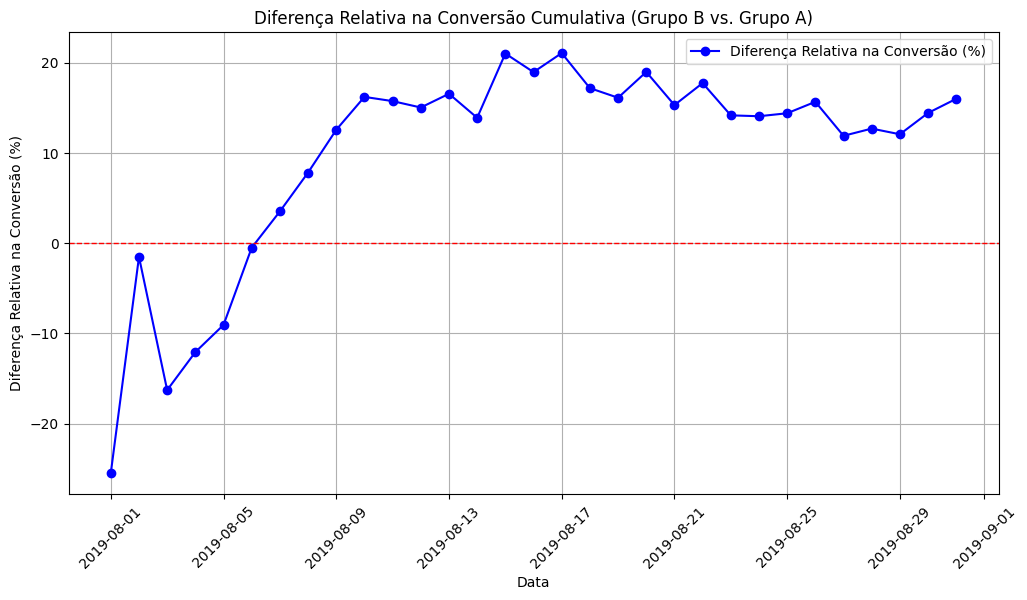

In [20]:
#5 grafico
plt.figure(figsize=(12, 6))

#diferença relativa na conversão cumulativa ao longo do tempo
plt.plot(merged_conversion_data['date'], merged_conversion_data['relative_difference_conversion'], marker='o', linestyle='-', color='b', label='Diferença Relativa na Conversão (%)')

#título e rótulos
plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa na Conversão (%)')
plt.xticks(rotation=45)
plt.grid(True)

#linha de referência em 0%
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)

plt.legend()
plt.show()

- Com o gráfico podemos observar que no começo tivemos uma Diferença Relativa na Conversão Cumulativa Negativa, porém à partir de 2019-08-06 passou a ter uma diferença Positiva. Significando que a conversão cumulativa do grupo B é maior do que a do grupo A.
- Podendo sugerir que as estratégias de marketing aplicadas ao grupo B são mais eficazes para conversão. Nesse caso, pode ser útil expandir essas estratégias. Analisar essas diferenças ao longo do tempo ajuda a identificar oportunidades para otimização e melhoria contínua das campanhas de marketing.

In [21]:
#6
#número de pedidos por usuário
orders_per_user = orders_us.groupby('visitorid').agg({'transactionid': 'count'}).reset_index()
orders_per_user = orders_per_user.rename(columns={'transactionid': 'orders_count'})

#percentis 95 e 99
percentile_95 = orders_per_user['orders_count'].quantile(0.95)
percentile_99 = orders_per_user['orders_count'].quantile(0.99)

print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')

#definir o ponto de anomalia
anomaly_threshold = percentile_99
print(f'Ponto de anomalia: {anomaly_threshold}')

Percentil 95: 1.0
Percentil 99: 2.0
Ponto de anomalia: 2.0


<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Aqui você também poderia analisar o número de pedidos por usuário. Exemplo:
```python
# calcula da quantidade de pedidos por usuário
orders_by_users = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))

# renomeia as colunas do novo conjunto de dados
orders_by_users.columns = ['visitor_id', 'orders']

# ordena pela quantidade de pedidos
orders_by_users.sort_values(by='orders', ascending=False).head(10)
```
        
</div>

- O percentil 95 representa o ponto abaixo do qual 95% dos números de pedidos por usuário estão. Neste caso, o percentil de 95 é 2, isso significa que 95% dos usuários fizeram 2 pedidos ou menos.
- O percentil 99 representa o ponto abaixo do qual 99% dos números de pedidos por usuário estão. Logo, o percentil de 99 é 5, isso indica que 99% dos usuários fizeram 5 pedidos ou menos.
- Qualquer usuário que fez mais pedidos do que o percentil 99 (por exemplo, mais de 2 pedidos se o percentil 99 for 2) pode ser considerado uma anomalia.
- Essas anomalias podem indicar usuários altamente engajados, compradores frequentes, ou podem ser contas fraudulentas ou comportamento não usual.

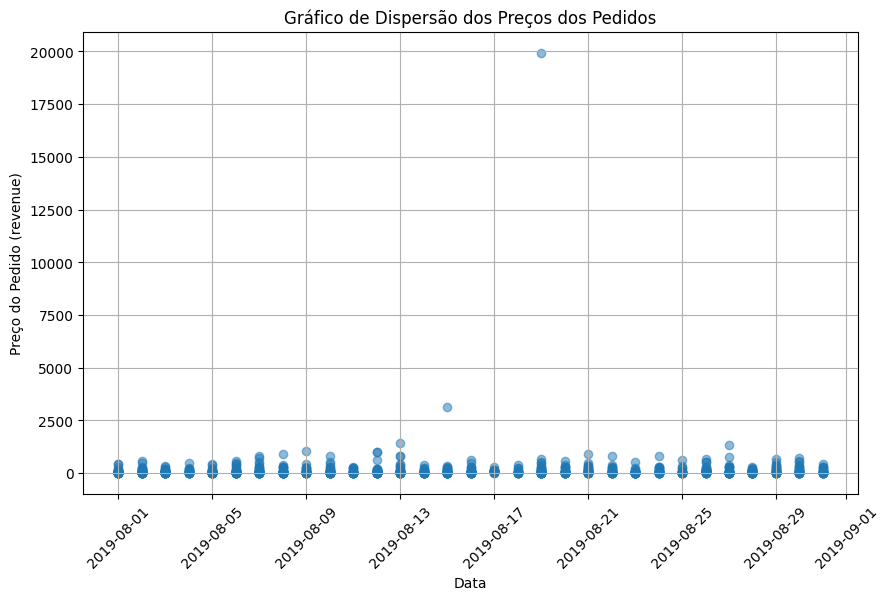

In [22]:
#7
plt.figure(figsize=(10, 6))

#gráfico de dispersão para os preços dos pedidos
plt.scatter(orders_us['date'], orders_us['revenue'], alpha=0.5)

#título e rótulos
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('Data')
plt.ylabel('Preço do Pedido (revenue)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

- O gráfico de dispersão dos preços dos pedidos oferece uma visão visual clara da distribuição dos preços ao longo do tempo e permite identificar padrões, tendências e possíveis anomalias.
- Podemos perceber que a maioria dos pontos então concentrados em uma faixa de preços, indicando que a maioria dos pedidos tem preços semelhantes. Também existem alguns pontos afastados (outliers), que podem indicar pedidos excepcionalmente caros ou erros de entrada de dados.

In [23]:
#8
#percentis 95 e 99 dos preços dos pedidos
percentile_95 = orders_us['revenue'].quantile(0.95)
percentile_99 = orders_us['revenue'].quantile(0.99)

print(f'Percentil 95 dos preços dos pedidos: {percentile_95:.2f}')
print(f'Percentil 99 dos preços dos pedidos: {percentile_99:.2f}')

#ponto de anomalia
anomaly_threshold = percentile_99
print(f'Ponto de anomalia para preços dos pedidos: {anomaly_threshold:.2f}')

Percentil 95 dos preços dos pedidos: 414.27
Percentil 99 dos preços dos pedidos: 830.30
Ponto de anomalia para preços dos pedidos: 830.30


- O percentil 95 representa o ponto abaixo do qual 95% dos números de pedidos por usuário estão. Neste caso, o percentil 95 é 414.27, isso significa que 95% dos pedidos têm um preço de 414,27 unidades monetárias ou menos.
- O percentil 99 representa o valor abaixo do qual 99% dos preços dos pedidos se situam. Logo, o percentil 99 é 830.30, então 99% dos pedidos têm um preço de 830,30 unidades monetárias ou menos.
- Qualquer pedido com um preço acima do percentil 99 pode ser considerado uma anomalia. Esses pedidos representam os 1% mais altos em termos de preço e podem ser considerados fora do comum.
- Essas anomalias podem indicar usuários altamente engajados, compradores frequentes, ou podem ser contas fraudulentas ou comportamento não usual.

In [24]:
#9
#número de pedidos por grupo
orders_per_group = orders_us.groupby('group').agg({'transactionid': 'count'}).reset_index()
orders_per_group = orders_per_group.rename(columns={'transactionid': 'orders_count'})

#número de visitas por grupo
visits_per_group = visits_us.groupby('group').agg({'visits': 'sum'}).reset_index()

#merge
conversion_data = pd.merge(orders_per_group, visits_per_group, on='group')

#taxa de conversão
conversion_data['conversion_rate'] = conversion_data['orders_count'] / conversion_data['visits']

print(conversion_data)

  group  orders_count  visits  conversion_rate
0     A           468   18736         0.024979
1     B           548   18916         0.028970


In [25]:
#dados
orders_A = conversion_data.loc[conversion_data['group'] == 'A', 'orders_count'].values[0]
orders_B = conversion_data.loc[conversion_data['group'] == 'B', 'orders_count'].values[0]

visits_A = conversion_data.loc[conversion_data['group'] == 'A', 'visits'].values[0]
visits_B = conversion_data.loc[conversion_data['group'] == 'B', 'visits'].values[0]

#taxa de conversão para cada grupo
conversion_rate_A = orders_A / visits_A
conversion_rate_B = orders_B / visits_B

#proporção combinada
combined_conversion_rate = (orders_A + orders_B) / (visits_A + visits_B)

#erro padrão combinado
std_error = ((combined_conversion_rate * (1 - combined_conversion_rate) * (1/visits_A + 1/visits_B)) ** 0.5)

#valor z
z_score = (conversion_rate_B - conversion_rate_A) / std_error

#valor p
p_value = stats.norm.sf(abs(z_score)) * 2  #multiplicar por 2 para um teste bicaudal

print(f"Taxa de Conversão Grupo A: {conversion_rate_A:.4f}")
print(f"Taxa de Conversão Grupo B: {conversion_rate_B:.4f}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Valor: {p_value:.4f}")

Taxa de Conversão Grupo A: 0.0250
Taxa de Conversão Grupo B: 0.0290
Z-Score: 2.3899
P-Valor: 0.0169


- Os resultados do teste z para proporções fornece uma compreensão clara da significância estatística da diferença na conversão entre os grupos A e B. Esta análise é crucial para tomar decisões informadas sobre estratégias de marketing e otimização de campanhas para maximizar a conversão e, portanto, o lucro.

In [26]:
#10
#separar os dados
revenue_A = orders_us[orders_us['group'] == 'A']['revenue']
revenue_B = orders_us[orders_us['group'] == 'B']['revenue']

#tamanho médio dos pedidos
mean_revenue_A = revenue_A.mean()
mean_revenue_B = revenue_B.mean()

print(f'Tamanho médio do pedido para o Grupo A: {mean_revenue_A:.2f}')
print(f'Tamanho médio do pedido para o Grupo B: {mean_revenue_B:.2f}')

#teste t de Student
t_stat, p_value = stats.ttest_ind(revenue_A, revenue_B, equal_var=False)

print(f'Estatística t: {t_stat:.4f}')
print(f'P-Valor: {p_value:.4f}')

Tamanho médio do pedido para o Grupo A: 113.70
Tamanho médio do pedido para o Grupo B: 145.35
Estatística t: -0.8345
P-Valor: 0.4043


Tamanho médio do pedido:
- Grupo A: 113.70
- Grupo B: 145.35

Com o valor-p de 0.4043, concluímos que a diferença no tamanho médio do pedido entre os grupos A e B não é estatisticamente significativa. Portanto, não podemos afirmar com confiança que o grupo B tem um tamanho médio de pedido maior do que o grupo A com base nos dados fornecidos.

In [27]:
#11
#percentil 99 dos preços dos pedidos
percentile_99 = orders_us['revenue'].quantile(0.99)

#remover outliers
filtered_orders_us = orders_us[orders_us['revenue'] <= percentile_99]

#número de pedidos por grupo nos dados filtrados
filtered_orders_per_group = filtered_orders_us.groupby('group').agg({'transactionid': 'count'}).reset_index()
filtered_orders_per_group = filtered_orders_per_group.rename(columns={'transactionid': 'orders_count'})

#número de visitas por grupo (os dados de visitas não precisam ser filtrados, pois estamos focando em conversões)
visits_per_group = visits_us.groupby('group').agg({'visits': 'sum'}).reset_index()

#merge
filtered_conversion_data = pd.merge(filtered_orders_per_group, visits_per_group, on='group')

#taxa de conversão
filtered_conversion_data['conversion_rate'] = filtered_conversion_data['orders_count'] / filtered_conversion_data['visits']

#dados para o teste a partir dos dados filtrados
filtered_orders_A = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'A', 'orders_count'].values[0]
filtered_orders_B = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'B', 'orders_count'].values[0]

visits_A = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'A', 'visits'].values[0]
visits_B = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'B', 'visits'].values[0]

#taxa de conversão para cada grupo usando os dados filtrados
filtered_conversion_rate_A = filtered_orders_A / visits_A
filtered_conversion_rate_B = filtered_orders_B / visits_B

#proporção combinada
combined_conversion_rate_filtered = (filtered_orders_A + filtered_orders_B) / (visits_A + visits_B)

#calcular o erro padrão combinado
std_error_filtered = ((combined_conversion_rate_filtered * (1 - combined_conversion_rate_filtered) * (1/visits_A + 1/visits_B)) ** 0.5)

#valor z usando os dados filtrados
z_score_filtered = (filtered_conversion_rate_B - filtered_conversion_rate_A) / std_error_filtered

#valor p usando os dados filtrados
p_value_filtered = stats.norm.sf(abs(z_score_filtered)) * 2  # Multiplicar por 2 para um teste bicaudal

print(f"Taxa de Conversão Grupo A (filtrados): {filtered_conversion_rate_A:.4f}")
print(f"Taxa de Conversão Grupo B (filtrados): {filtered_conversion_rate_B:.4f}")
print(f"Z-Score (filtrados): {z_score_filtered:.4f}")
print(f"P-Valor (filtrados): {p_value_filtered:.4f}")

Taxa de Conversão Grupo A (filtrados): 0.0247
Taxa de Conversão Grupo B (filtrados): 0.0288
Z-Score (filtrados): 2.4336
P-Valor (filtrados): 0.0149


Taxas de Conversão Filtradas:
- Grupo A: 0.0247 (ou 2.47%)
- Grupo B: 0.0288 (ou 2.88%)

Z-Score (filtrados): 2.4336:
- O Z-score mede o número de desvios padrão que a diferença observada entre as taxas de conversão está longe da média esperada sob a hipótese nula (de que não há diferença real nas taxas de conversão entre os grupos). Um Z-score de 2.4336 indica que a diferença observada está a cerca de 2.43 desvios padrão da média esperada sob a hipótese nula.

Com um valor-p de 0.0149 e um Z-score de 2.4336, concluímos que a diferença na taxa de conversão entre os grupos A e B é estatisticamente significativa. A taxa de conversão mais alta no grupo B sugere que a intervenção testada nesse grupo foi eficaz para aumentar a conversão. Recomenda-se investigar mais a fundo os motivos dessa melhoria e considerar a possibilidade de implementar as mudanças mais amplamente.

In [28]:
#12
#separar os dados de receita por grupo
filtered_revenue_A = filtered_orders_us[filtered_orders_us['group'] == 'A']['revenue']
filtered_revenue_B = filtered_orders_us[filtered_orders_us['group'] == 'B']['revenue']

#tamanho médio do pedido para cada grupo usando os dados filtrados
mean_filtered_revenue_A = filtered_revenue_A.mean()
mean_filtered_revenue_B = filtered_revenue_B.mean()

print(f'Tamanho médio do pedido para o Grupo A (filtrados): {mean_filtered_revenue_A:.2f}')
print(f'Tamanho médio do pedido para o Grupo B (filtrados): {mean_filtered_revenue_B:.2f}')

#teste t de Student para amostras
t_stat_filtered, p_value_filtered = stats.ttest_ind(filtered_revenue_A, filtered_revenue_B, equal_var=False)

print(f'Estatística t (filtrados): {t_stat_filtered:.4f}')
print(f'P-Valor (filtrados): {p_value_filtered:.4f}')

Tamanho médio do pedido para o Grupo A (filtrados): 103.16
Tamanho médio do pedido para o Grupo B (filtrados): 99.94
Estatística t (filtrados): 0.3782
P-Valor (filtrados): 0.7054


Tamanho Médio do Pedido Filtrado:
- Grupo A: 103.16
- Grupo B: 99.94

Estatística t (filtrados): 0.3782:
- A estatística t mede a diferença entre os tamanhos médios dos pedidos em termos de desvios padrão. Um valor de t muito próximo de 0 sugere que as médias dos dois grupos são muito semelhantes. Um valor de 0.3782 indica que a diferença observada entre os tamanhos médios dos pedidos é pequena e está bem dentro do que seria esperado devido ao acaso.

P-Valor (filtrados): 0.7054

Com um valor-p de 0.7054 e uma estatística t de 0.3782, concluímos que a diferença no tamanho médio do pedido entre os grupos A e B, usando os dados filtrados, não é estatisticamente significativa. A intervenção testada no grupo B não teve um impacto claro no tamanho médio do pedido. Recomenda-se explorar outras métricas e possíveis segmentações para entender melhor o impacto da intervenção.

In [29]:
#13
#Tomada de Decisão

###### Decisão: Pare o teste, conclua que não há diferença entre os grupos.

- Após analisar os resultados do teste A/B, observamos que a diferença no tamanho médio dos pedidos entre os grupos A e B não é estatisticamente significativa. Com um valor-p de 0.7054, muito acima do nível de significância comum de 0.05, não há evidência suficiente para rejeitar a hipótese nula de que não há diferença real no tamanho médio dos pedidos entre os grupos.  Essa conclusão sugere que ambas as estratégias testadas nos grupos A e B são igualmente eficazes em termos de impacto no tamanho médio do pedido. Portanto, a intervenção aplicada ao grupo B não resultou em uma melhoria significativa em comparação com o grupo A.
- Recomenda-se encerrar o teste, pois a continuação provavelmente não trará novos insights significativos. Recursos e esforços devem ser redirecionados para explorar outras hipóteses ou estratégias com maior impacto em métricas de interesse. Também é sugerida a revisão das hipóteses e novas abordagens para diferenciar mais claramente os resultados entre grupos em futuros testes.

</div><div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>

- As conclusões finais foram apresentadas
- A recomendação foi de parar o teste. Vale ressaltar que, a depender do cenário, uma alternativa seria rodar o teste por mais tempo para coletar mais dados. Entretanto, o custo de rodar esse processo por mais tempo seria maior e possivelmente inviável para a organização.

</div>